In [ ]:
!pip install tensorflow keras


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.7 MB/s eta 0:03:45
   ---------------------------------------- 0.8/376.0 MB 1.5 MB/s eta 0:04:18
   ---------------------------------------- 1.0/376.0 MB 1.2 MB/s eta 0:05:06
   ---------------------------------------- 1.3/376.0 MB 1.2 MB/s eta 0:05:13
   ---------------------------------------- 1.3/376.0 MB 1.2 MB/s eta 0:05:13
   ---------------------------------

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
filenames = os.listdir(r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\train")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [7]:
df.head()

filename  category
0     Autistic.0.jpg         1
1     Autistic.1.jpg         1
2    Autistic.10.jpg         1
3   Autistic.100.jpg         1
4  Autistic.1000.jpg         1

In [8]:
df.tail()

filename  category
2535  Non_Autistic.995.jpg         0
2536  Non_Autistic.996.jpg         0
2537  Non_Autistic.997.jpg         0
2538  Non_Autistic.998.jpg         0
2539  Non_Autistic.999.jpg         0

In [ ]:
import os

# Directory path
directory_path = r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\train"

# Sample filename
sample = random.choice(filenames)  # Make sure sample contains the filename you want to load

# Create the full file path
file_path = os.path.join(directory_path, sample)

# Now load the image
image = load_img(file_path)


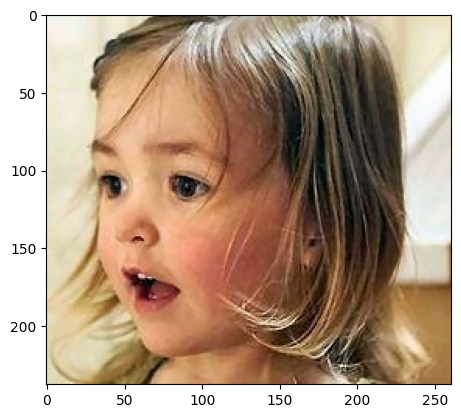

In [10]:
plt.imshow(image)

In [11]:
# CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
# patience value
earlystop = EarlyStopping(patience=30)

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

In [16]:
# Data preparation for training
df["category"] = df["category"].replace({0: 'Non_Autistic', 1: 'Autistic'}) 

In [17]:
# 80:20 ratio
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

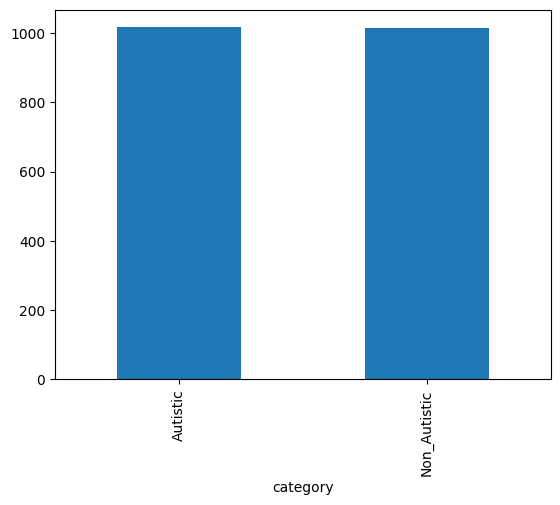

In [18]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

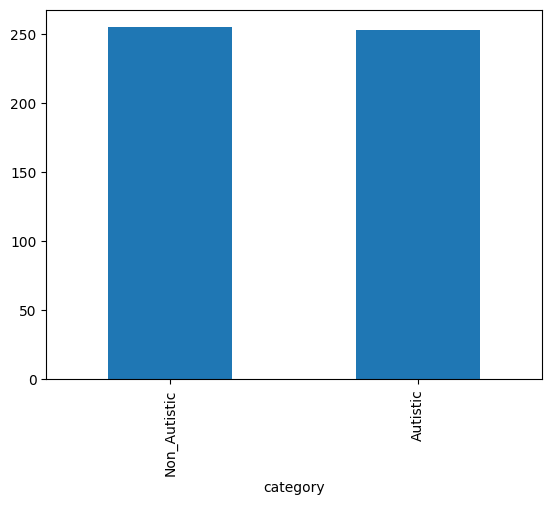

In [19]:
validate_df['category'].value_counts().plot.bar()

In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

In [ ]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2032 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 508 validated image filenames belonging to 2 classes.


In [30]:
# Fit Model
epochs = 3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)


c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 995ms/step - accuracy: 0.6182 - loss: 1.5017 - val_accuracy: 0.5021 - val_loss: 3.6644 - learning_rate: 0.0010
Epoch 2/50


c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


 1/63 ━━━━━━━━━━━━━━━━━━━━ 36s 588ms/step - accuracy: 0.7188 - loss: 0.7389

c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7188 - loss: 0.7389 - val_accuracy: 0.5083 - val_loss: 4.2496 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 630ms/step - accuracy: 0.6310 - loss: 0.9123 - val_accuracy: 0.4979 - val_loss: 2.8396 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6250 - loss: 0.9393 - val_accuracy: 0.4917 - val_loss: 4.0913 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step - accuracy: 0.6555 - loss: 0.7379 - val_accuracy: 0.5000 - val_loss: 4.1031 - learning_rate: 0.0010
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7812 - loss: 0.6477 - val_accuracy: 0.4958 - val_loss: 4.4292 - learning_rate: 0.0010
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 585ms/step - accuracy: 0.6768 - loss: 0.6982 - val_accuracy: 0.4979 - val_loss: 2.2749 - learning_rate: 0.0010
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6250 - loss: 0.7078 - val_accuracy

In [32]:
model.save_weights("model.weights.h5")  # Note the `.weights.h5` suffix


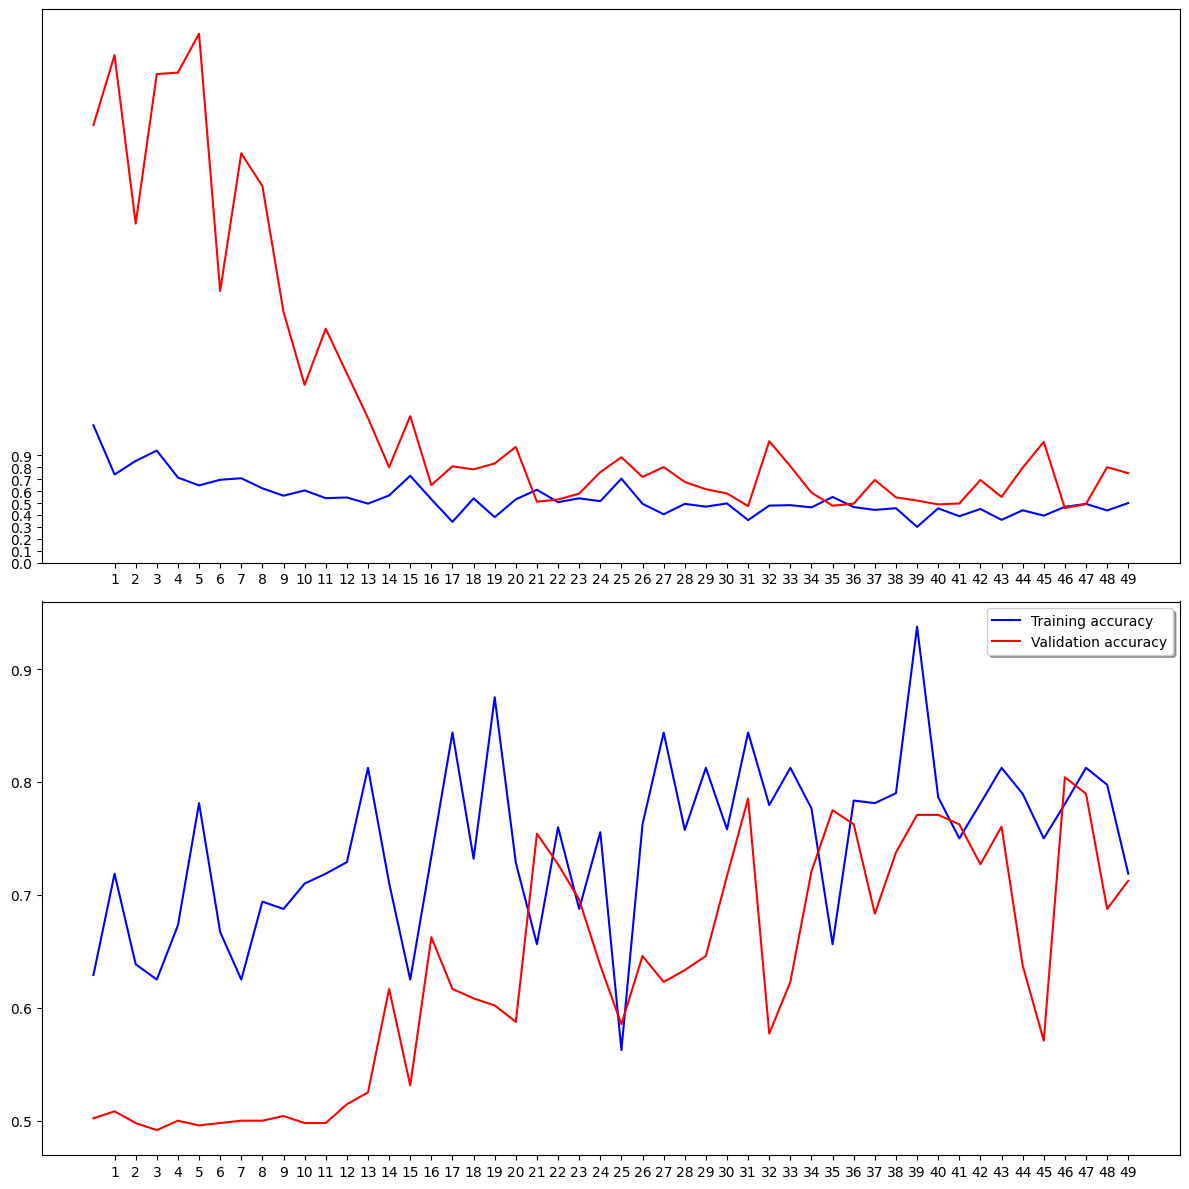

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
# Prepare Testing Data
test_filenames = os.listdir(r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [35]:
print(nb_samples)

300


In [ ]:
# Create Testing Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\train", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 300 validated image filenames.


In [40]:
predict = model.predict(
    test_generator,
    steps=int(np.ceil(nb_samples / batch_size))
)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


In [41]:
test_df['category'] = np.argmax(predict, axis=-1)

In [42]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [43]:
test_df['category'] = test_df['category'].replace({ 'Autistic': 1, 'Non_Autistic': 0 })

C:\Users\kusha\AppData\Local\Temp\ipykernel_27148\1938739623.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'Autistic': 1, 'Non_Autistic': 0 })


<Axes: xlabel='category'>

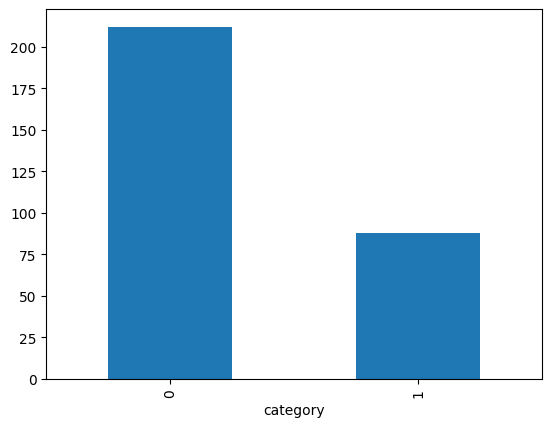

In [44]:
test_df['category'].value_counts().plot.bar()

In [46]:
model.save("newmodel.keras")

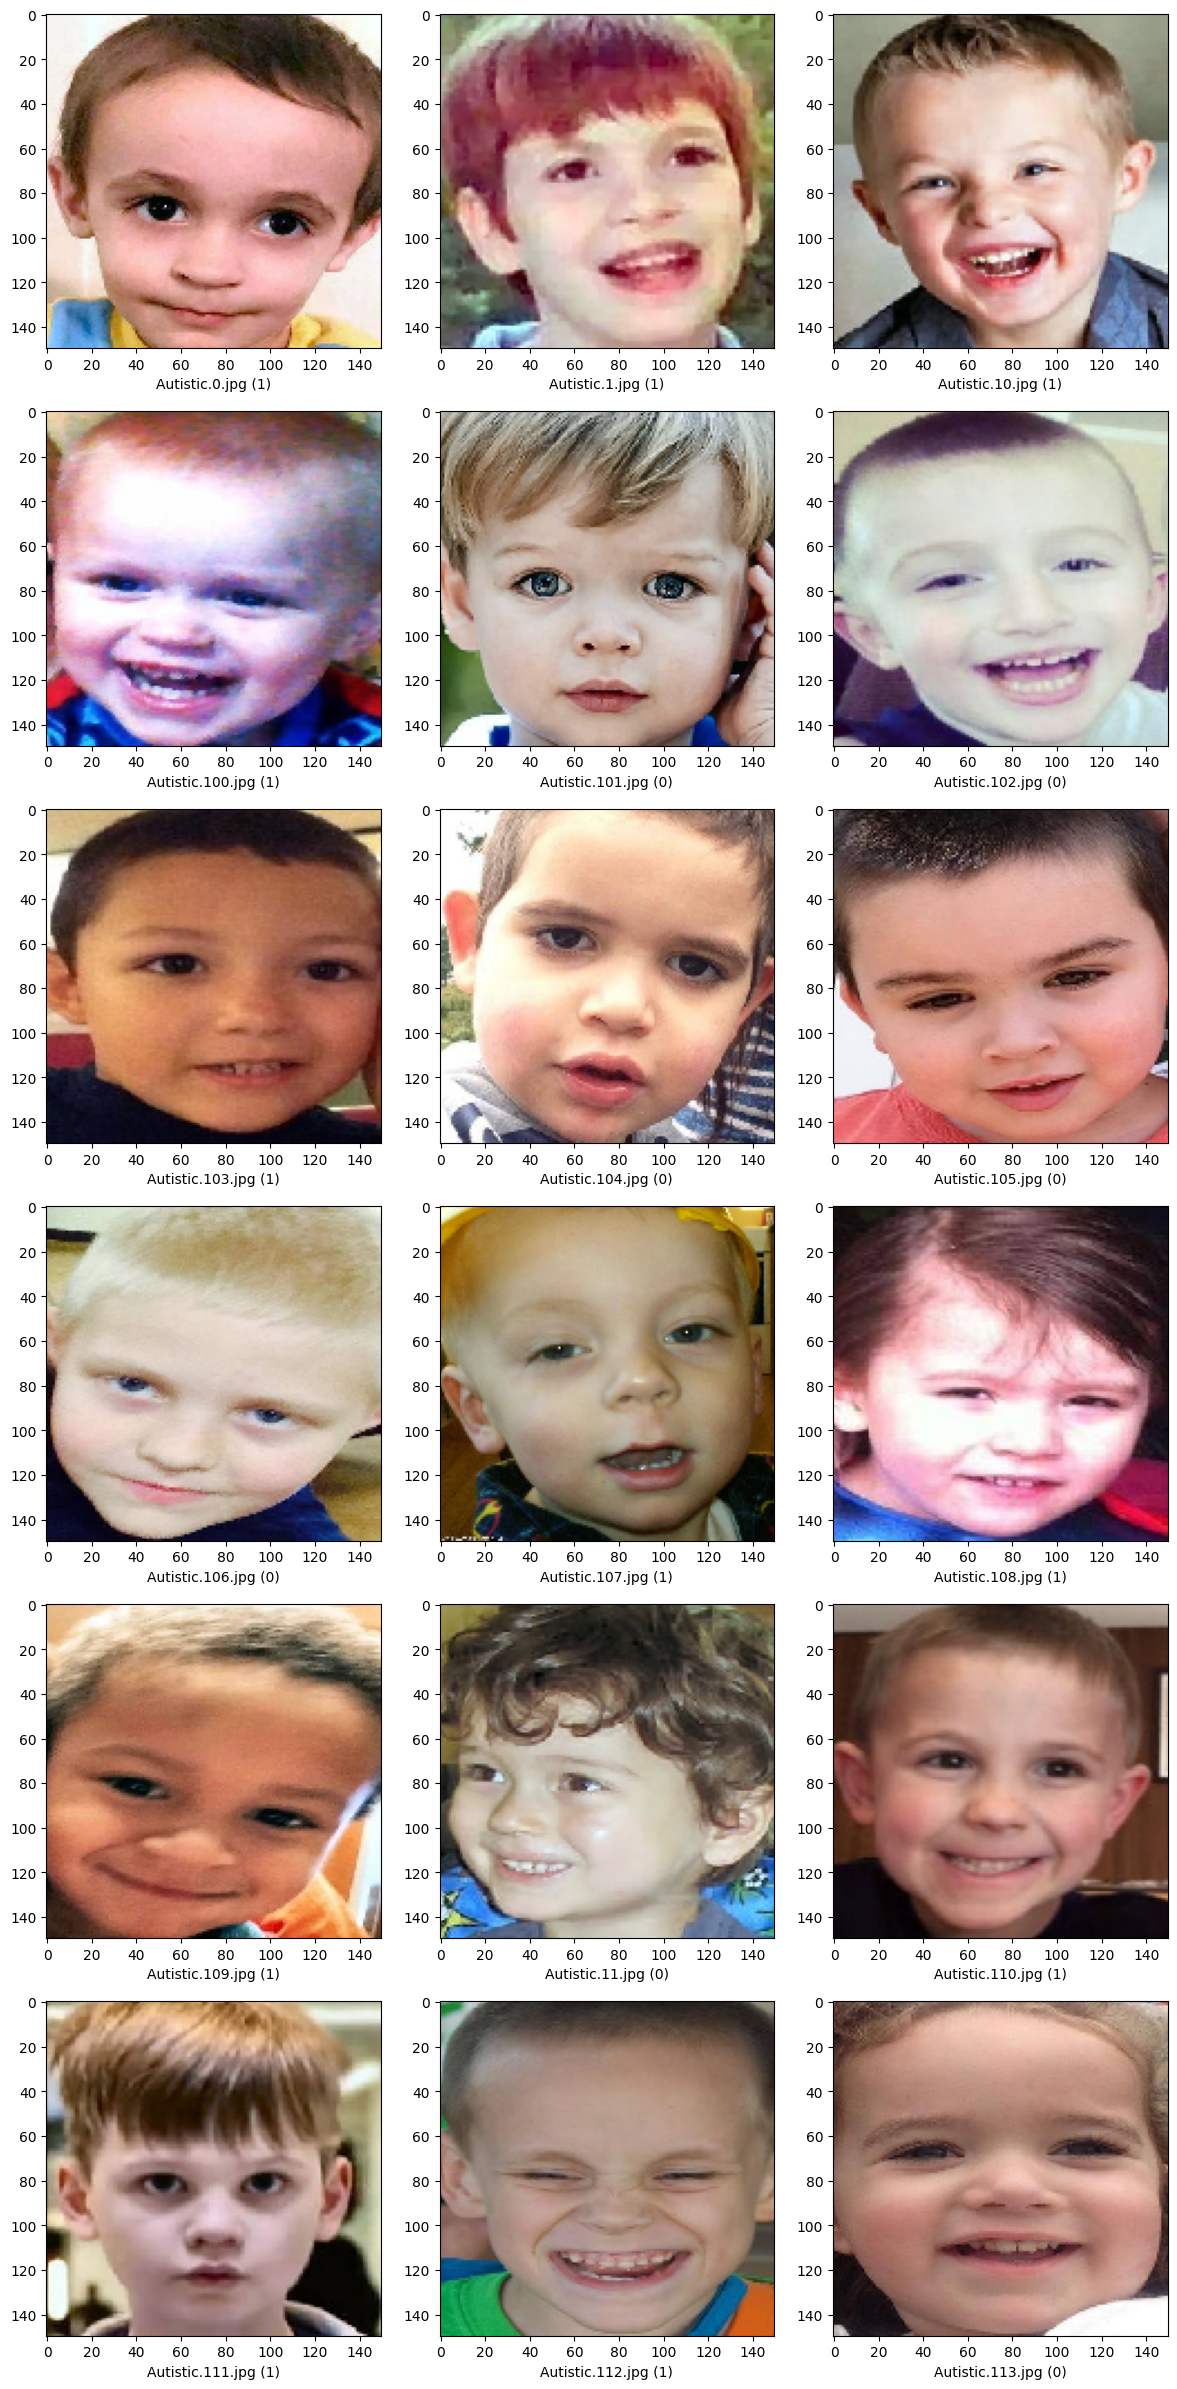

In [ ]:
# Define the directory path and image size
directory_path =     r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Dataset\train"
IMAGE_SIZE = (150, 150)  # Adjust the target size as needed

# Assuming you have a DataFrame named 'sample_test'
sample_test = test_df.head(18)

# Create a figure with subplots
plt.figure(figsize=(12, 24))

# Iterate through the DataFrame rows
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    
    # Construct the file path using os.path.join
    file_path = os.path.join(directory_path, filename)

    # Load the image
    img = load_img(file_path, target_size=IMAGE_SIZE)
    
    # Create a subplot
    plt.subplot(6, 3, index % 18 + 1)
    
    # Display the image and label
    plt.imshow(img)
    plt.xlabel(filename + ' (' + str(category) + ')')

# Ensure proper spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [48]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [49]:
pd.read_csv("submission.csv")

id  label
0        Autistic      1
1        Autistic      1
2        Autistic      1
3        Autistic      1
4        Autistic      0
..            ...    ...
295  Non_Autistic      1
296  Non_Autistic      1
297  Non_Autistic      0
298  Non_Autistic      0
299  Non_Autistic      0

[300 rows x 2 columns]

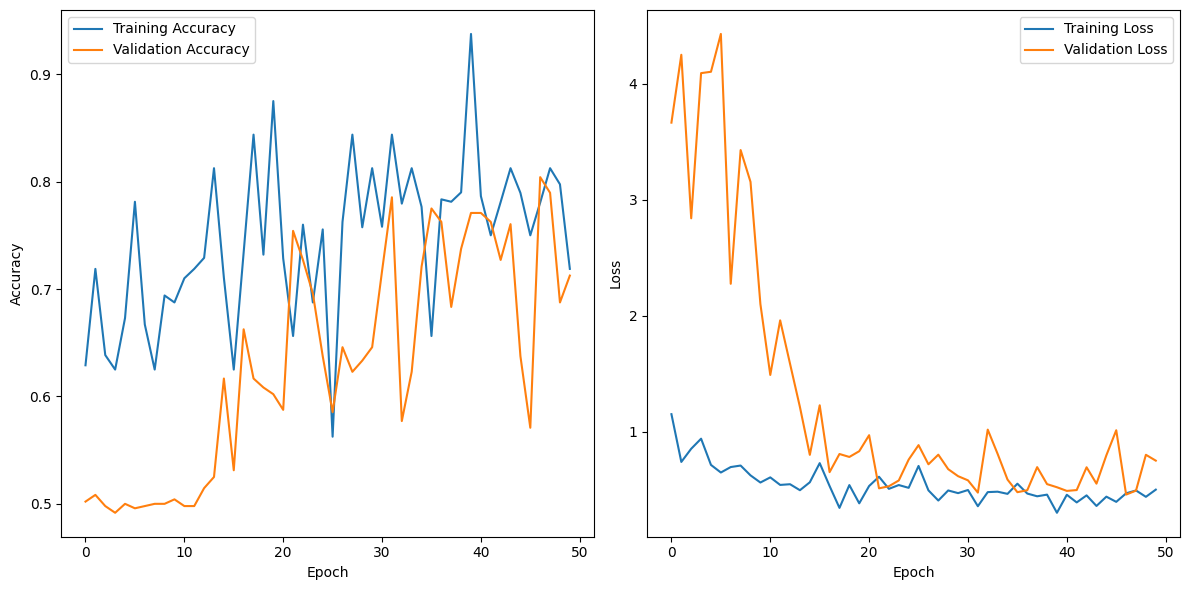

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
